In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# 1. 데이터 로드 및 전처리
# 신용카드 데이터셋을 불러옵니다.

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WISDM.csv')


In [4]:
df

,0,33,Jogging,4.9106E+13,-0.6946377,12.680544,0.50395286
0,1,33,Jogging,4.910610e+13,5.012288,11.264028,0.953424
1,2,33,Jogging,4.910610e+13,4.903325,10.882658,-0.081722
2,3,33,Jogging,4.910620e+13,-0.612916,18.496431,3.023717
3,4,33,Jogging,4.910630e+13,-1.184970,12.108489,7.205164
4,5,33,Jogging,4.910640e+13,1.375655,-2.492524,-6.510526
...,...,...,...,...,...,...,...
1048569,1048571,7,Standing,2.091650e+14,-7.930000,5.430000,-0.990000
1048570,1048572,7,Standing,2.091660e+14,-7.970000,5.130000,-1.140000
1048571,1048573,7,Standing,2.091660e+14,-7.970000,5.220000,-1.380000
1048572,1048574,7,Standing,2.091660e+14,-7.930000,5.600000,-1.180000


In [5]:
df.columns = ['id', 'user', 'activity', 'time', 'x', 'y', 'z']


In [6]:
df.shape

(1048574, 7)

In [7]:
df.isnull().values.any()

np.False_

In [8]:
# 2. Jogging / Sitting 데이터만 선택
df = df[df['activity'].isin(['Jogging', 'Sitting'])]


In [9]:
# 3. 라벨 인코딩
df['label'] = df['activity'].map({'Sitting': 0, 'Jogging': 1})

/tmp/ipython-input-2791269251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['activity'].map({'Sitting': 0, 'Jogging': 1})


In [10]:
# 4. 특징 선택
X = df[['x', 'y', 'z']]
y = df['label']

In [11]:
# 5. Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
# 6. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# 7. DNN 모델 정의
model = Sequential([
    Dense(32, activation='relu', input_shape=(3,)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# 8. 학습
history = model.fit(
    X_train_scaled, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/15
7617/7617 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9131 - loss: 0.2115 - val_accuracy: 0.9652 - val_loss: 0.0943
Epoch 2/15
7617/7617 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9651 - loss: 0.0942 - val_accuracy: 0.9772 - val_loss: 0.0685
Epoch 3/15
7617/7617 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9745 - loss: 0.0757 - val_accuracy: 0.9783 - val_loss: 0.0632
Epoch 4/15
7617/7617 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9779 - loss: 0.0701 - val_accuracy: 0.9843 - val_loss: 0.0570
Epoch 5/15
7617/7617 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9799 - loss: 0.0647 - val_accuracy: 0.9847 - val_loss: 0.0539
Epoch 6/15
7617/7617 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9820 - loss: 0.0592 - val_accuracy: 0.9857 - val_loss: 0.0486
Epoch 7/15
7617/7617 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9828 - loss: 0.0563 - val_accuracy: 0.9866 - val_loss: 0.0456
Epoch 8/15
7617/7617 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9838 - loss: 0

In [15]:
# 9. 평가
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



2381/2381 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.990258632007352

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     10975
           1       1.00      0.99      0.99     65195

    accuracy                           0.99     76170
   macro avg       0.98      0.98      0.98     76170
weighted avg       0.99      0.99      0.99     76170



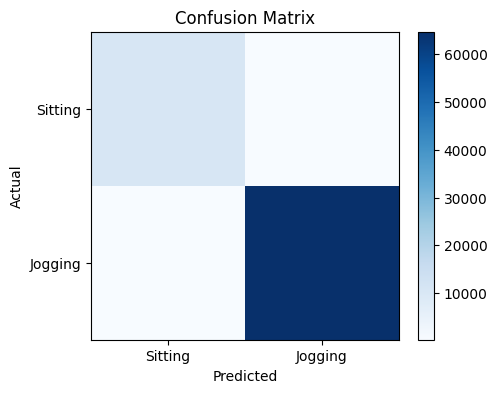

In [16]:
# 10. 혼동 행렬
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ['Sitting', 'Jogging'])
plt.yticks([0,1], ['Sitting', 'Jogging'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()